In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from math import sqrt, log
%matplotlib inline

C:\Users\lenovo\AppData\Roaming\Python\Python35\site-packages\sklearn\cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataForXGB = pd.read_pickle('dataForResult.pkl')
dataY = pd.read_pickle('dataY.pkl')

In [3]:
holidayData = pd.read_csv(r'date.csv',parse_dates = [0])
holidayData_Org = holidayData
holidayData = holidayData.set_index('date')

#weather = pd.read_csv(r'yangzhong_weather.csv',parse_dates = [0])
weather = pd.read_csv('yangzhong_weather.csv',parse_dates = [0])
weather = weather.set_index('date')

In [4]:
result_Sep = pd.read_pickle('Seperated_result.pkl')

In [5]:
## result

In [6]:
seed = 42

In [10]:
dTrain1 = xgb.DMatrix(dataForXGB.iloc[:578,:],dataY.sum()[:578])
dTest1 = xgb.DMatrix(dataForXGB.iloc[578:609,:],dataY.sum()[578:609])
dTrain_F = xgb.DMatrix(dataForXGB.iloc[:609,:],dataY.sum()[:609])
dTest_F = xgb.DMatrix(dataForXGB.iloc[609:,:],dataY.sum()[579:609])

num_round = 44
evallist1 = [(dTrain1,'train'),(dTest1,'test')]

param = {'bst:max_depth':12,
         'bst:eta':0.01,
         'subsample':0.8,
         'colsample_bytree':0.7,
         'silent':1,
         'objective':'reg:linear',
         'nthread':6,
         'eval_metric':'rmse',
         'seed':seed}

plst = param.items()

bst = xgb.train(plst, dTrain_F, num_round, evallist1, 
                verbose_eval=20, 
                early_stopping_rounds=250)

prediction_Re = bst.predict(dTest_F)

result = pd.Series(prediction_Re).astype(int)
result.to_csv('result20170529.csv')

resultOfPrev = pd.read_csv('Tianchi_power_predict_table.csv')

[0]	train-rmse:1.05855e+06	test-rmse:1.35598e+06
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 250 rounds.
[20]	train-rmse:56368	test-rmse:32889.1
[40]	train-rmse:32811.3	test-rmse:20276.7


In [11]:
prophet_result = pd.read_csv(r'./result/prophet_Result.csv',header = None)

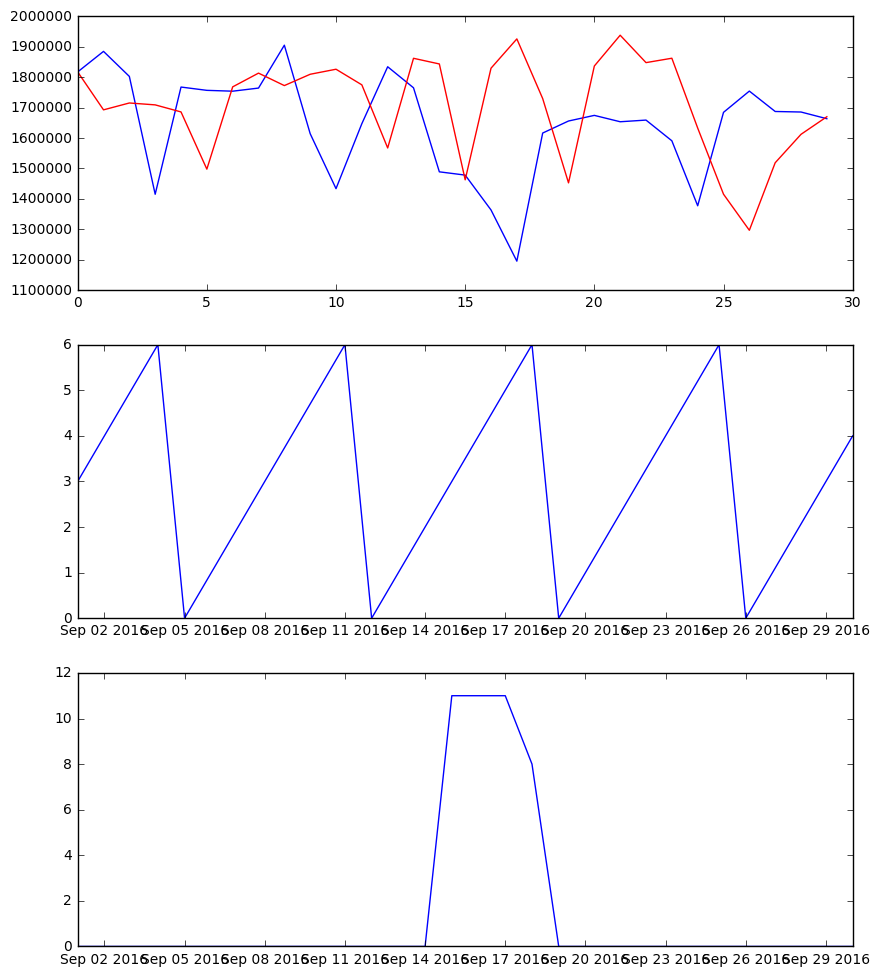

In [16]:
plt.figure(figsize = [10,12])
plt.subplot(3,1,1)
plt.plot(prediction_Re,color = 'b')
plt.plot(result_Sep,color = 'r')
#plt.plot(resultOfPrev.iloc[:,1],color = 'r')
#plt.plot(list(resultOfProphet.iloc[-30:,1]),color = 'g')

plt.subplot(3,1,2)
plt.plot(weather.index[-30:],holidayData_Org.dayOfWeek[:639].astype('category').cat.codes[-30:])

plt.subplot(3,1,3)
plt.plot(weather.index[-30:],holidayData_Org.date_type[:639].astype('category').cat.codes[-30:])